003で，「$\frac{1}{2}$の確率で$1$が，$\frac{1}{4}$の確率で$2$が，$\frac{1}{8}$の確率で$3$が，$\frac{1}{16}$の確率で$4$が，と言ったように，nを自然数として，$\frac{1}{2^n}$の確率で$n$がスクリーン上に表示される機械」が出てきたが，今回はそれを実装してみようと思う．

0から1までの乱数からこのような数を生成するとする．

一様分布の0以上1以下の乱数$r$がある時に，$\frac{1}{2^n}$の確率で$f(r) = n$となる関数fがあれば良い．

$\displaystyle g(\sum_{k=1}^{n} 2^{-k}) = n$とし，gを0から1までで単調増加な関数とすると，$f(x) = \lceil g(x) \rceil$がこの条件を満たす．

$$ \displaystyle g(\sum_{k=1}^{n} 2^{-k}) = n $$
$$ g(1 - 2^{-n}) = n $$
$$ g(x) = log_2(\frac{1}{-x+1}) $$

以上より，$ f(x) = \lceil log_2(\frac{1}{-x+1}) \rceil $ が条件を満たす関数である．実際にpython上で定義してグラフを書いてみよう．

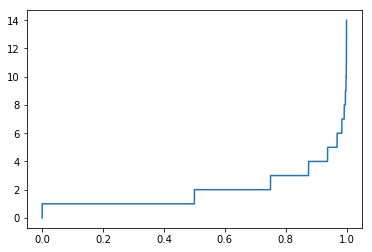

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: np.ceil(np.log2(1/(-x+1)))
x = np.arange(0,1,0.0001)
y = f(x)
plt.plot(x, y)
plt.show()

次に，10000000回ランダムな値を入れてみて，度数分布と割合をみてみる．

In [2]:
n = 10000000
x = np.random.rand(n)
y = f(x)

y_min = int(y.min())
y_max = int(y.max())
y_sorts = int(y.max()) - int(y.min())

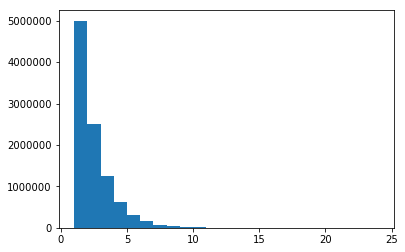

In [3]:
plt.hist(y, bins=y_sorts)
plt.show()

In [4]:
import pandas as pd

pre = 7

pd.set_option('precision', pre)

ratio = np.histogram(y, bins=y_sorts)[0] / n

pw = 1/(2**np.arange(y_min, y_max))

df = pd.DataFrame(
    {
        "割合": np.round(ratio, pre),
        r"$\frac{1}{2^n}$": np.round(pw, pre),
        "差": np.round(ratio - pw, pre)
    }, index=range(y_min, y_max)
)

df[["割合", r"$\frac{1}{2^n}$", "差"]]

,割合,$\frac{1}{2^n}$,差
1,0.4998406,0.5000000,-0.0001594
2,0.2499857,0.2500000,-0.0000143
3,0.1252351,0.1250000,0.0002351
4,0.0624657,0.0625000,-0.0000343
5,0.0312511,0.0312500,0.0000011
6,0.0155895,0.0156250,-0.0000355
7,0.0078727,0.0078125,0.0000602
8,0.0038614,0.0039062,-0.0000448
9,0.0019548,0.0019531,0.0000017
10,0.0009719,0.0009766,-0.0000047


最後の問題である，$\frac{a}{b}$が整数である確率のことも確かめてみる．61%というかなりの高い確率が出たが，果たして本当だろうか．

In [5]:
n = 5000000

x1 = np.random.rand(n)
y1 = f(x1)

x2 = np.random.rand(n)
y2 = f(x2)

isint = np.mod(y1 / y2, 1) == 0

cnt = np.count_nonzero(isint)

In [6]:
cnt / n

0.6065982

おおおおおお！！！！！  
15桁で求めた値は0.606695152415292だったことを考えると，かなりの精度だ！！！
こちらも表にしてみる．

In [7]:
cut = 30
pd.DataFrame({"a": y1[:cut], "b": y2[:cut], "整数かどうか": isint[:cut]})

,a,b,整数かどうか
0,1.0,2.0,False
1,4.0,1.0,True
2,2.0,3.0,False
3,5.0,1.0,True
4,1.0,1.0,True
5,5.0,1.0,True
6,1.0,2.0,False
7,3.0,1.0,True
8,2.0,1.0,True
9,1.0,1.0,True
